In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
%matplotlib inline

In [4]:
df = pd.read_csv('voice.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [7]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

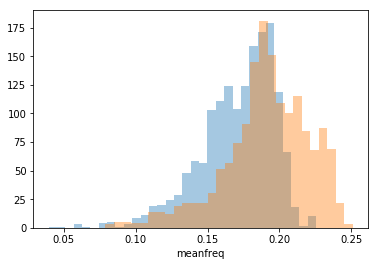

In [8]:
sns.distplot(df[df['label'] == 'male']['meanfreq'], kde = False)
sns.distplot(df[df['label'] == 'female']['meanfreq'], kde = False)

In [9]:
X = df.drop('label', axis = 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [10]:
model = SVC()

In [11]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
prediction = model.predict(X_test)

In [13]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

             precision    recall  f1-score   support

     female       0.77      0.65      0.70       486
       male       0.68      0.80      0.74       465

avg / total       0.73      0.72      0.72       951

[[314 172]
 [ 94 371]]


In [14]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [15]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [16]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] gamma=1, kernel=linear, C=1 .....................................
[CV] ............................ gamma=1, kernel=linear, C=1 -   4.9s
[CV] gamma=1, kernel=linear, C=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ............................ gamma=1, kernel=linear, C=1 -   3.6s
[CV] gamma=1, kernel=linear, C=1 .....................................
[CV] ............................ gamma=1, kernel=linear, C=1 -   1.7s
[CV] gamma=1, kernel=rbf, C=1 ........................................
[CV] ............................... gamma=1, kernel=rbf, C=1 -   0.2s
[CV] gamma=1, kernel=rbf, C=1 ........................................
[CV] ............................... gamma=1, kernel=rbf, C=1 -   0.2s
[CV] gamma=1, kernel=rbf, C=1 ........................................
[CV] ............................... gamma=1, kernel=rbf, C=1 -   0.2s
[CV] gamma=0.1, kernel=linear, C=1 ...................................
[CV] .......................... gamma=0.1, kernel=linear, C=1 -   4.9s
[CV] gamma=0.1, kernel=linear, C=1 ...................................
[CV] .......................... gamma=0.1, kernel=linear, C=1 -   3.6s
[CV] gamma=0.1, kernel=linear, C=1 ...................................
[CV] .

[CV] ........................... gamma=0.1, kernel=rbf, C=100 -   0.3s
[CV] gamma=0.001, kernel=linear, C=100 ...............................
[CV] ...................... gamma=0.001, kernel=linear, C=100 -   9.8s
[CV] gamma=0.001, kernel=linear, C=100 ...............................
[CV] ...................... gamma=0.001, kernel=linear, C=100 -  33.6s
[CV] gamma=0.001, kernel=linear, C=100 ...............................
[CV] ...................... gamma=0.001, kernel=linear, C=100 -  44.1s
[CV] gamma=0.001, kernel=rbf, C=100 ..................................
[CV] ......................... gamma=0.001, kernel=rbf, C=100 -   0.2s
[CV] gamma=0.001, kernel=rbf, C=100 ..................................
[CV] ......................... gamma=0.001, kernel=rbf, C=100 -   0.2s
[CV] gamma=0.001, kernel=rbf, C=100 ..................................
[CV] ......................... gamma=0.001, kernel=rbf, C=100 -   0.2s
[CV] gamma=0.0001, kernel=linear, C=100 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 15.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [17]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [19]:
predic = grid.predict(X_test)

In [20]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

             precision    recall  f1-score   support

     female       0.97      0.97      0.97       486
       male       0.97      0.97      0.97       465

avg / total       0.97      0.97      0.97       951

[[473  13]
 [ 13 452]]
